# Linear Regression with Python

## Linear Regression using Scikit-Learn

### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For multiple linear regression, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### About the dataset
This [dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. This [dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) is openly available as a part of UCI Machine Learning Respository.

### Attribute Information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Task
We have to predict the number of bikes rented in an hour given information about weather, date, and time.

In [2]:
# Loading data
data = pd.read_csv("hour.csv")
data.drop(["season","instant","dteday","casual","registered"],axis=1,inplace=True) # Removing redundant columns
data.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
X = data.drop(["cnt"],axis=1) # Explanatory(independent) variables
y = data["cnt"] # Dependent variable

Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.  

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

The `fit` method of the `LinearRegression()` class actually trains models and estimates the best possible intercept and coefficient(s). 

In [5]:
# Fitting a linear model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# The coefficients for the given features
model_coefs = pd.DataFrame({'Feature/Column': list(X.columns), 'Coefficient': model.coef_})
model_coefs

,Feature/Column,Coefficient
0,yr,81.971191
1,mnth,4.837439
2,hr,7.688105
3,holiday,-28.898042
4,weekday,1.880932
5,workingday,2.321959
6,weathersit,-5.267441
7,temp,73.143282
8,atemp,258.357317
9,hum,-190.865634


**Interpreting model coefficients** - We can gather a lot of trends and information just by intrepreting the model coefficients.

Some examples:
* `yr` - All else held constant, each successive year around 82 more bikes are likely to be rented per hour.
* `holiday` - All else held constant, on a holiday around 29 less bikes are likely to be rented per hour

In [7]:
# The model's intercept
model.intercept_

-17.921467890250256

We can use `predict` method to take predictions of the test set.

In [8]:
# Taking predictions for the test set
y_pred = model.predict(X_test)

We will be evaluating the model now. We will start by using the metrics R-squared score and RMSE.

**R-squared score** - This score varies from 0 to 1 and represents the proportion of variance of the dependent variable explained by the independent variable(s). It conveys the extent to which the variance of one variable explains the variance of the other. The ideal score is 1.0 which conveys that 100% of the variance of the dependent variable is explained by the independent variables.

In [9]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))

The R-squared score is 0.3845


The model used above explains only 38.45% variance of the dependent variable. This can be improved using more data and better features.

**Root Mean Squared Error(RMSE)** - RMSE is the standard deviation of the residuals (prediction errors). It measures the spread of the data around the line of best fit. RMSE is always non-negative with a value of 0 being ideal. A lower RMSE is better than a higher one. RMSE of two different datasets should not be compared as this measure is dependent on the scales of the data.

\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n \left(\hat{y_i} - y_i \right)^2}{n}}
\end{align}

Here, $\hat{y}$ is the predicted value and y is the observed value. n is the number of rows in the dataset. 

In [10]:
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The Root Mean Squared error is 141.9909


**Residuals** are prediction errors i.e., difference between the observed value and the predicted value.

\begin{align}
e = y - \hat{y}
\end{align}

Residuals are used in various performance metrics and can be used to visualize model performance. Below is a residuals plot. A resdiuals plot shows residuals on the vertical axis and predicted values on the horizontal axis. In a ideal residuals plot, the distribution of residuals around the target is random and unifiorm centered around zero. A good model leads to constant variability in the residuals plot.

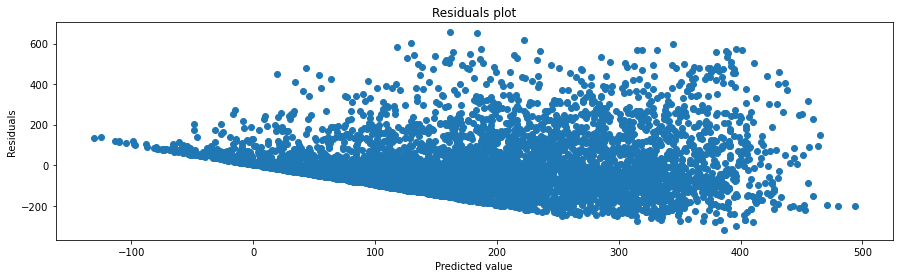

In [11]:
# Residuals plot(overall)
plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred)
plt.title("Residuals plot")
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.show()

The residuals plot above is not randomly or uniformly distributed. In fact, there are some predictions with negative values which is not possible as the dependent variable(bike count) can't be negative. The histogram below also depicts that the error is not normally distributed around zero but slightly right-skewed. We need a better model as this is not a good fit.

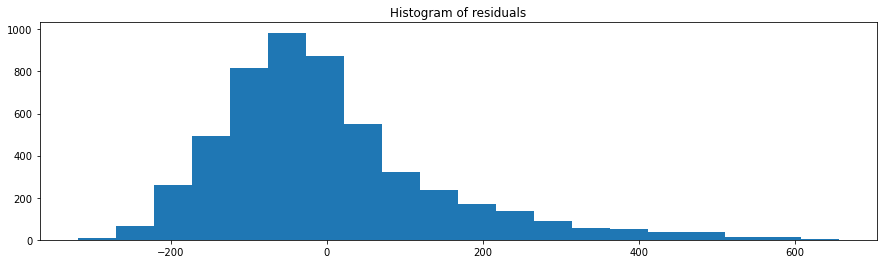

In [12]:
plt.figure(figsize=(15,4))
plt.hist(y_test-y_pred, bins= 20)
plt.title("Histogram of residuals")
plt.show()

**QQ-plot** is formed when quantiles of two variables are plotted against each other. Ideally, all points should lie on or close to the straight line at an angle of 45&deg;.

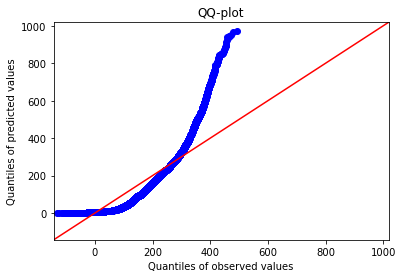

In [13]:
## Normal QQ-plot
qqplot_2samples(y_test,y_pred,line='45')
plt.title("QQ-plot")
plt.xlabel("Quantiles of observed values")
plt.ylabel("Quantiles of predicted values")
plt.show()

Clearly, very few points lie close to the 45&deg; line and for most quantiles, x quantiles are lower than y quantiles. It indicates that observed values have a tendency to be lower than predicted values. A model with a better fit is needed.

**Conclusion:** The baseline model that includes all eligible variables is not a good fit. More data and better feature selection strategy might improve the model performance.